In [114]:
import pandas as pd
import numpy as np

In [23]:
data = pd.read_csv('../data/client_dataset_csv.csv', index_col=0)
print(data.shape)
data.head()

(12673, 8)


,position,age,country,city,key_skills,client_name,grade_proof,salary
0,"""программист"" (по факту аналитик), отдел проек...",34.0,Россия,Барнаул,"Анализ требований, Разработка ТЗ, Управление т...",ТОП Финтех,не подтверждён,Вероника претендует на Грейд 2 (Остальные реги...
1,(Повышение) Инженер отдела управления инфрастр...,35.0,Россия,Калининград,Организация обработки конфиденциальной информа...,"ТОП IT (сервисы, интеграторы)",не подтверждён,"Минимум 200 (net, без учёта премий), комфорт 2..."
2,(Повышение) Инженер отдела управления инфрастр...,35.0,Россия,Калининград,Организация обработки конфиденциальной информа...,ТОП Телеком,не подтверждён,"Минимум 200 (net, без учёта премий), комфорт 2..."
3,(Повышение) Инженер отдела управления инфрастр...,35.0,Россия,Калининград,Организация обработки конфиденциальной информа...,"ТОП IT (сервисы, интеграторы)",не подтверждён,"Минимум 200 (net, без учёта премий), комфорт 2..."
4,(Повышение) Инженер отдела управления инфрастр...,35.0,Россия,Калининград,Организация обработки конфиденциальной информа...,ТОП Финтех,не подтверждён,"Минимум 200 (net, без учёта премий), комфорт 2..."


In [26]:
data[data.grade_proof == 'подтверждён'].client_name.value_counts()

client_name
ТОП Финтех                       550
ТОП IT (сервисы, интеграторы)     83
ТОП Телеком                       69
X5 Group                          21
Cloud.ru                          12
Яндекс Маркет                      7
ЮЛаки                              7
Сбер Еаптека                       7
ТОП eCOM                           7
Click2Money                        3
Nebius                             3
Amdocs                             3
М.Видео – Эльдорадо                3
Брусника                           3
ЛитРес                             2
4 Лапы                             2
Хеликон                            2
Fun&Sun                            2
РСХБ                               2
Loymax                             2
OZON                               2
Казино NDA                         2
Самолёт                            2
585 RPO                            1
Equifax                            1
Papa John's                        1
Brand Analytics           

In [30]:
data.position.value_counts()

position
Системный аналитик                            679
Ведущий системный аналитик                    215
Java Developer                                183
Java-разработчик                              170
DevOps                                        149
                                             ... 
Tech Lead (Ansible)                             1
Tech Lead / ранее Ведущий Java разработчик      1
Tech Lead AQA                                   1
Tech Lead DevOps                                1
‮                                               1
Name: count, Length: 4033, dtype: int64

In [14]:
data.position = data.position.apply(lambda x: x.lower())# value_counts().head()

In [15]:
data.position.value_counts().head()

position
.net разработчик                                         40
.net developer                                           27
.net backend developer                                    6
(повышение) инженер отдела управления инфраструктурой     4
1с программист                                            4
Name: count, dtype: int64

In [152]:
popularity = data.groupby('client_name').size() # Популярность компании
popularity.head()

client_name
4 Лапы         15
585 RPO        29
Air Liquide     4
Amdocs         46
Auxo            2
dtype: int64

In [103]:
staff_turnover = data[data.grade_proof == 'подтверждён'].groupby('client_name').size() # Текучка кадров
staff_turnover.mean()

25.15625

In [145]:
competition = data.groupby(['client_name', 'position']).size()
confirmed_count = data[data['grade_proof'] == 'подтверждён'].groupby(['client_name', 'position']).size()
competition_df = competition.to_frame(name='total_applicants').join(
    confirmed_count.to_frame(name='confirmed_applicants'), how='left'
)
competition_df['confirmed_applicants'] = competition_df['confirmed_applicants'].fillna(0)  # Заполнить NaN нулями
competition_df['competition_ratio'] = competition_df['total_applicants'] / competition_df['confirmed_applicants']
competition_df['competition_ratio'].replace(np.inf, np.nan, inplace=True)  # Убрать бесконечности (если нет подтверждённых)

competition_df[competition_df.competition_ratio != np.nan]

total_applicants  \
client_name  position                                                         
4 Лапы       UX/UI Дизайнер                                               1   
             Администратор проектов                                       1   
             Аналитик                                                     1   
             Бухгалтер                                                    1   
             Главный бухгалтер                                            2   
...                                                                     ...   
Яндекс.Cloud Ведущий python Разработчик                                   1   
             Ведущий разработчик                                          1   
             Программист-разработчик                                      1   
             Старший разработчик                                          1   
             Старший разработчик программного обеспечения                 1   

                                                           confirmed_applicants  \
client_name  position                                                             
4 Лапы       UX/UI Дизайнер                                                 0.0   
             Администратор проектов                                         0.0   
             Аналитик                                                       0.0   
             Бухгалтер                                                      0.0   
             Главный бухгалтер                                              1.0   
...                                                                         ...   
Яндекс.Cloud Ведущий python Разработчик                                     0.0   
             Ведущий разработчик                                            0.0   
             Программист-разработчик                                        0.0   
             Старший разработчик                                            0.0   
             Старший разработчик программного обеспечения                   0.0   

                                                           competition_ratio  
client_name  position                                                         
4 Лапы       UX/UI Дизайнер                                              NaN  
             Администратор проектов                                      NaN  
             Аналитик                                                    NaN  
             Бухгалтер                                                   NaN  
             Главный бухгалтер                                           2.0  
...                                                                      ...  
Яндекс.Cloud Ведущий python Разработчик                                  NaN  
             Ведущий разработчик                                         NaN  
             Программист-разработчик                                     NaN  
             Старший разработчик                                         NaN  
             Старший разработчик программного обеспечения                NaN  

[5876 rows x 3 columns]

In [146]:
competition_df.dropna(subset=['competition_ratio'])

total_applicants  \
client_name   position                                                         
4 Лапы        Главный бухгалтер                                            2   
              Начальник службы информационной безопасности                 1   
585 RPO       Lead DevOps Engineer                                         1   
Amdocs        Frontend-developer                                           2   
              Software Engineer                                            3   
...                                                                      ...   
Яндекс Маркет DevOps                                                       3   
              DevOps Tech Lead                                             1   
              Senior Data Engineer                                         1   
              старший специалист по большим данным                         1   
Яндекс.Cloud  Android developer                                            2   

                                                            confirmed_applicants  \
client_name   position                                                             
4 Лапы        Главный бухгалтер                                              1.0   
              Начальник службы информационной безопасности                   1.0   
585 RPO       Lead DevOps Engineer                                           1.0   
Amdocs        Frontend-developer                                             1.0   
              Software Engineer                                              1.0   
...                                                                          ...   
Яндекс Маркет DevOps                                                         1.0   
              DevOps Tech Lead                                               1.0   
              Senior Data Engineer                                           1.0   
              старший специалист по большим данным                           1.0   
Яндекс.Cloud  Android developer                                              1.0   

                                                            competition_ratio  
client_name   position                                                         
4 Лапы        Главный бухгалтер                                           2.0  
              Начальник службы информационной безопасности                1.0  
585 RPO       Lead DevOps Engineer                                        1.0  
Amdocs        Frontend-developer                                          2.0  
              Software Engineer                                           3.0  
...                                                                       ...  
Яндекс Маркет DevOps                                                      3.0  
              DevOps Tech Lead                                            1.0  
              Senior Data Engineer                                        1.0  
              старший специалист по большим данным                        1.0  
Яндекс.Cloud  Android developer                                           2.0  

[562 rows x 3 columns]

In [151]:
data.client_name.unique()

array(['ТОП Финтех', 'ТОП IT (сервисы, интеграторы)', 'ТОП Телеком',
       'X5 Group', 'Черкизово', 'BIOCAD', 'Hoff', 'Яндекс Райдтех',
       'Крок', 'Nebius', 'Click2Money', 'Pay365', 'OZON', 'РСХБ',
       'Хеликон', 'Cloud.ru', 'Самолёт', 'Яндекс Маркет', 'Яндекс.Cloud',
       'ТОП eCOM', 'IVI', 'Banki.ru', '585 RPO', 'Сбер Еаптека',
       'Информзащита', 'Казино NDA', 'Onpoint', 'Food Rocket', 'Hawex',
       'Loymax', 'EggHeads', 'Брусника', 'Amdocs', 'ЮЛаки', 'Fun&Sun',
       'nil.foundation', 'Brand Analytics', 'М.Видео – Эльдорадо',
       'Equifax', 'Mercury', 'Прочее', 'МТС Банк (Аутсорс)',
       'МТС (Аутсорс)', 'Хантфлоу', "Papa John's", 'Национальная Лотерея',
       'ЛитРес', 'InDrive', 'Просвещение', 'Совкомбанк',
       'Национальная Медиа Группа (МСБ)', 'ЦБ РФ', 'SRG Group', 'Этнамед',
       'Usetech', 'Яндекс. Такси', 'АО Азот-Взрыв', 'Glue up',
       'PIM Solutions', 'Metaship', 'Sitronics', '4 Лапы', 'Ингосстрах',
       'Nestle', 'Auxo', 'Айтуби', 'Sunlight

In [29]:
confirmed_cases = data[data['grade_proof'] == 'подтверждён']

# Шаг 2: Определим пары (position, client_name) с подтверждёнными случаями
confirmed_positions = confirmed_cases[['position', 'client_name']].drop_duplicates()

# Шаг 3: Найдём пары, которых нет среди подтверждённых
all_positions = data[['position', 'client_name']].drop_duplicates()
not_confirmed_positions = all_positions.merge(
    confirmed_positions,
    on=['position', 'client_name'],
    how='left',
    indicator=True
).query('_merge == "left_only"')[['position', 'client_name']]

# Результат
print("Компании и позиции без подтверждённых случаев:")
not_confirmed_positions

Компании и позиции без подтверждённых случаев:


,position,client_name
0,"""программист"" (по факту аналитик), отдел проек...",ТОП Финтех
1,(Повышение) Инженер отдела управления инфрастр...,"ТОП IT (сервисы, интеграторы)"
2,(Повышение) Инженер отдела управления инфрастр...,ТОП Телеком
3,(Повышение) Инженер отдела управления инфрастр...,ТОП Финтех
4,(Проектная работа) QC Engineer,"ТОП IT (сервисы, интеграторы)"
...,...,...
5869,старший Java разработчик,ТОП Финтех
5871,старший инженер тестировщик,ТОП Финтех
5873,тимлид(Lead),Сбер Еаптека
5874,фронтэнд разработчик,ТОП Финтех


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data.columns

Index(['position', 'age', 'country', 'city', 'key_skills', 'client_name',
       'grade_proof', 'salary'],
      dtype='object')

In [59]:
data['salary'][0]

'Вероника претендует на Грейд 2 (Остальные регионы).'

<Axes: xlabel='age', ylabel='Count'>

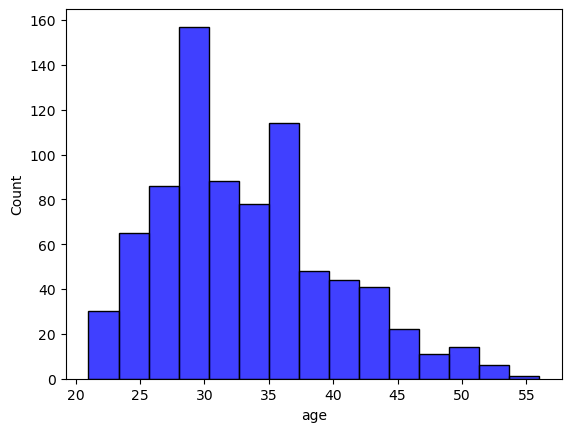

In [58]:
sns.histplot(data[data.grade_proof == 'подтверждён'].age, bins=15, color="blue", edgecolor="black")